Pathogen Detection Project

In [1]:
import numpy as np 
import pandas as pd 
import time 
from sklearn import preprocessing 

Data extraction

In [2]:
#explore dataset labels 

df_species = pd.read_csv('datasets/labels.csv', index_col=0)
df_species['genome_name'].value_counts()

decoy                          815912
burkholderia_pseudomallei        8558
pseudomonas_aeruginosa           7568
mycobacterium_ulcerans           6786
mycobacterium_tuberculosis       5265
staphylococcus_aureus            3412
corynebacterium_ulcerans         2962
corynebacterium_diphtheriae      2885
neisseria_gonorrhoeae            2637
streptococcus_pneumoniae         2600
staphylococcus_pyogenes          2078
Name: genome_name, dtype: int64

In [3]:
#load training labels & normalize label predictions 
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df_species['genome_name'].unique())
species_index = label_encoder.transform(df_species['genome_name'].values)

In [4]:
label_encoder.classes_

array(['burkholderia_pseudomallei', 'corynebacterium_diphtheriae',
       'corynebacterium_ulcerans', 'decoy', 'mycobacterium_tuberculosis',
       'mycobacterium_ulcerans', 'neisseria_gonorrhoeae',
       'pseudomonas_aeruginosa', 'staphylococcus_aureus',
       'staphylococcus_pyogenes', 'streptococcus_pneumoniae'],
      dtype=object)

In [5]:
species_index

array([8, 8, 8, ..., 3, 3, 3])

In [22]:
#load training dataset 
df = pd.read_csv('datasets/perfect_reads_6mer.gz', header=None, sep='\t', index_col=0)

In [23]:
#drop column of NA values 
df.drop(df.columns[2080] ,axis=1, inplace=True) 

In [24]:
#add column of truth labels 
df['genome_label'] = species_index

In [60]:
#extract top 25% feature columns into df using txt file
import json

#read the file back into a Python list object
with open('datasets/top-25-stratified.txt', 'r') as f:
    feature_list = json.loads(f.read())

In [62]:
feature_list.remove('genome_label')
feature_list = list(map(int, feature_list)) #need to convert string to integers for indexing 
feature_list.append('genome_label')

In [63]:
#dataframe of extracted features (top 25%) 
ex = pd.DataFrame(df, columns=feature_list)

In [64]:
ex

,1517,1934,326,2069,730,63,2001,1166,311,1504,...,1958,359,164,1853,910,882,1447,1544,1089,genome_label
0,0.000000,0.000000,0.002165,0.0,0.000000,0.000000,0.00000,0.000000,0.006494,0.000000,...,0.000000,0.001082,0.001082,0.000000,0.002165,0.000000,0.000000,0.000000,0.000000,8
1,0.000000,0.000000,0.003119,0.0,0.000000,0.000000,0.00000,0.001040,0.003119,0.000000,...,0.001040,0.001040,0.000000,0.000000,0.004158,0.000000,0.000000,0.001040,0.000000,8
2,0.000000,0.000000,0.001420,0.0,0.000000,0.000000,0.00142,0.000000,0.001420,0.000000,...,0.002841,0.000000,0.001420,0.000000,0.001420,0.000000,0.000000,0.000000,0.000000,8
3,0.000382,0.000382,0.003821,0.0,0.000382,0.000764,0.00000,0.000382,0.003057,0.000000,...,0.000382,0.000382,0.000764,0.000000,0.003821,0.000382,0.000000,0.000000,0.000382,8
4,0.000000,0.000240,0.002399,0.0,0.000000,0.000240,0.00000,0.000240,0.003598,0.000240,...,0.000959,0.001679,0.001439,0.000240,0.002159,0.000000,0.000000,0.000240,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860658,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
860659,0.000000,0.000618,0.002472,0.0,0.000618,0.000155,0.00000,0.000927,0.002009,0.000000,...,0.000618,0.001545,0.000309,0.000155,0.000927,0.000000,0.000155,0.000464,0.000000,3
860660,0.000000,0.000000,0.001686,0.0,0.000562,0.000000,0.00000,0.000000,0.001124,0.000000,...,0.000000,0.001124,0.001124,0.000000,0.001686,0.000000,0.000000,0.000000,0.000000,3
860661,0.000000,0.000286,0.001716,0.0,0.001430,0.000286,0.00000,0.000000,0.002002,0.000000,...,0.000000,0.000858,0.000858,0.000572,0.000858,0.000000,0.000000,0.000000,0.000000,3


In [65]:
#filter out decoy reads 
decoys = ex.loc[ex['genome_label']==3]
pathogens = ex.loc[ex['genome_label']!=3]

In [66]:
#pathogens = pathogens.groupby('genome_label', group_keys=False).apply(lambda x: x.sample(frac=0.45))
decoys = decoys.sample(frac=0.052)

#sample decoy reads & add back to df 
df_train = pathogens.append(decoys, ignore_index=True)

In [9]:
#prepare non-stratified training data set (subset)
#sample_size = 2078 
#df_train = df.groupby('genome_label').apply(lambda x: x.sample(sample_size))

In [67]:
df_train['genome_label'].value_counts()

3     42427
0      8558
7      7568
5      6786
4      5265
8      3412
2      2962
1      2885
6      2637
10     2600
9      2078
Name: genome_label, dtype: int64

In [68]:
import gzip 

#write training dataset to file 
df_train.to_csv('training-set-clean.csv.gz', index=False, compression='gzip')

Training set data visualization 

In [71]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle as pkl
import umap 
import umap.plot 
import numpy as np 
import pandas as pd 
from sklearn import preprocessing 

In [4]:
df_train = pd.read_csv('training-set-3.csv.gz')

In [69]:
df_train['genome_label'].value_counts()

3     42427
0      8558
7      7568
5      6786
4      5265
8      3412
2      2962
1      2885
6      2637
10     2600
9      2078
Name: genome_label, dtype: int64

In [7]:
#load training labels  
df_species = pd.read_csv('datasets/labels.csv', index_col=0)
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df_species['genome_name'].unique())

LabelEncoder()

In [72]:
#create umap object
mapper = umap.UMAP().fit(df_train)

In [73]:
#create labels for species 
labels = label_encoder.inverse_transform(df_train['genome_label'])

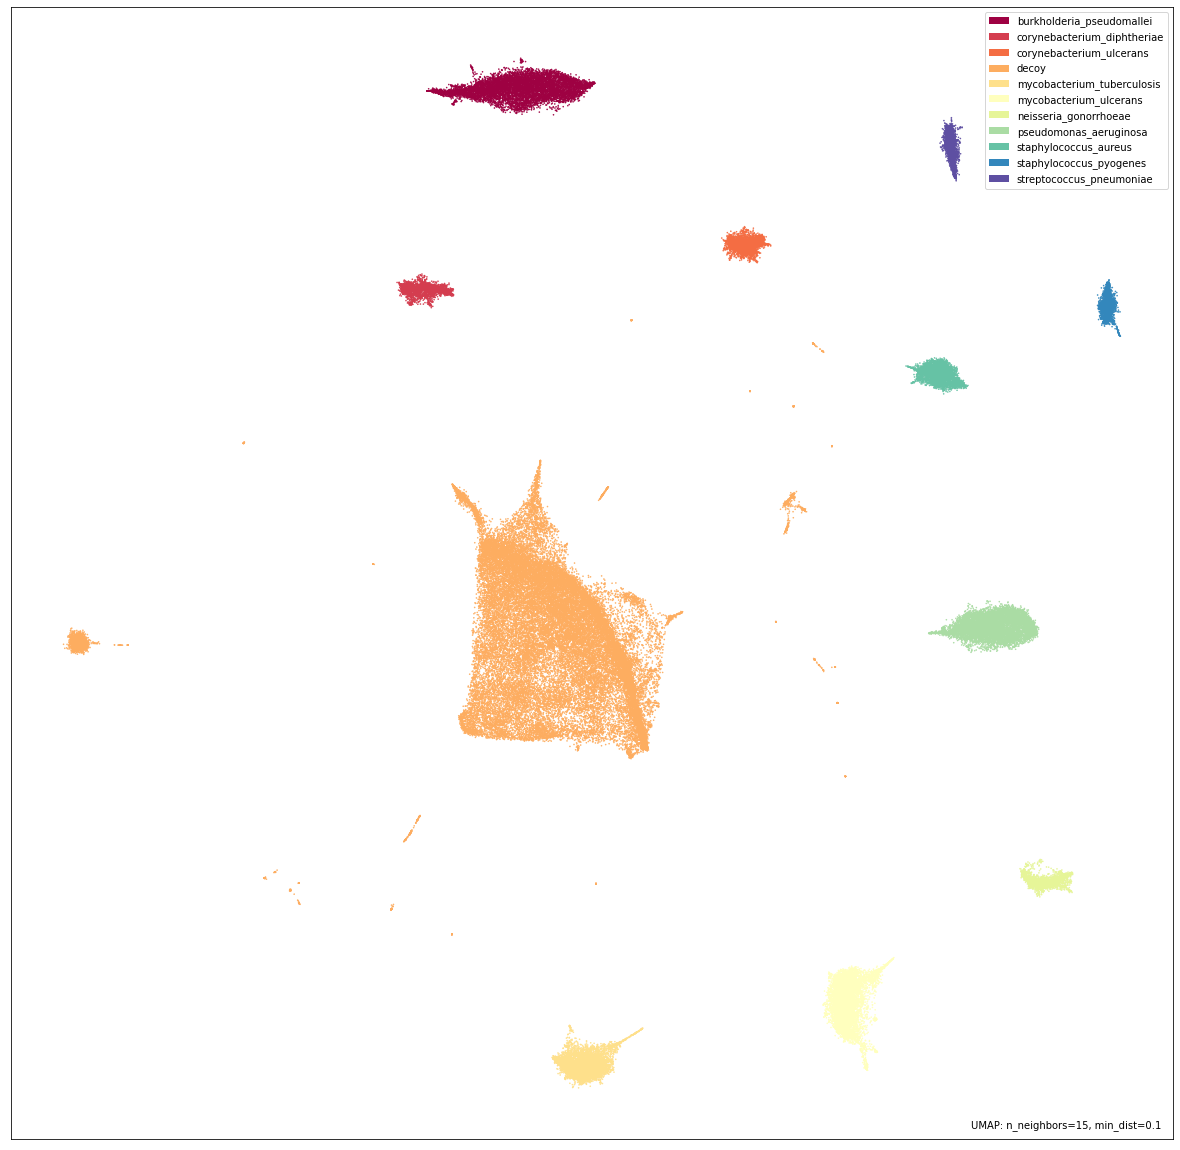

In [74]:
#plot umap 
map = umap.plot.points(mapper, labels=labels, width=1500, height=1500)